In [1]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns


In [2]:
url = ('formula1.csv')
datos = pd.read_csv(url)

# Transformaciones a algunas columnas.
datos['positionOrder'] = datos['positionOrder'].astype('int64')
datos['grid'] = datos['grid'].astype('int64')
datos['rankfast'] = datos['rankfast'].astype('int64')
datos['fastestLap']= datos['fastestLap'].replace(['\\N','0'])
datos['fastestLap'] = datos['fastestLap'].astype('int64')

datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1619 entries, 0 to 1618
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         1619 non-null   int64  
 1   raceId           1619 non-null   int64  
 2   driverId         1619 non-null   int64  
 3   constructorId    1619 non-null   int64  
 4   number           1619 non-null   int64  
 5   grid             1619 non-null   int64  
 6   position         1619 non-null   object 
 7   positionText     1619 non-null   object 
 8   positionOrder    1619 non-null   int64  
 9   points           1619 non-null   float64
 10  laps             1619 non-null   int64  
 11  time             1619 non-null   object 
 12  milliseconds     1619 non-null   object 
 13  fastestLap       1619 non-null   int64  
 14  rankfast         1619 non-null   int64  
 15  fastestLapTime   1619 non-null   object 
 16  fastestLapSpeed  1619 non-null   object 
 17  statusId      

In [11]:
url_results = ('results.csv')
datos_total = pd.read_csv(url_results)

datos_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25399 entries, 0 to 25398
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         25399 non-null  int64  
 1   raceId           25399 non-null  int64  
 2   driverId         25399 non-null  int64  
 3   constructorId    25399 non-null  int64  
 4   number           25399 non-null  object 
 5   grid             25399 non-null  int64  
 6   position         25399 non-null  object 
 7   positionText     25399 non-null  object 
 8   positionOrder    25399 non-null  int64  
 9   points           25399 non-null  float64
 10  laps             25399 non-null  int64  
 11  time             25399 non-null  object 
 12  milliseconds     25399 non-null  object 
 13  fastestLap       25399 non-null  object 
 14  rank             25399 non-null  object 
 15  fastestLapTime   25399 non-null  object 
 16  fastestLapSpeed  25399 non-null  object 
 17  statusId    

# Exploring Data

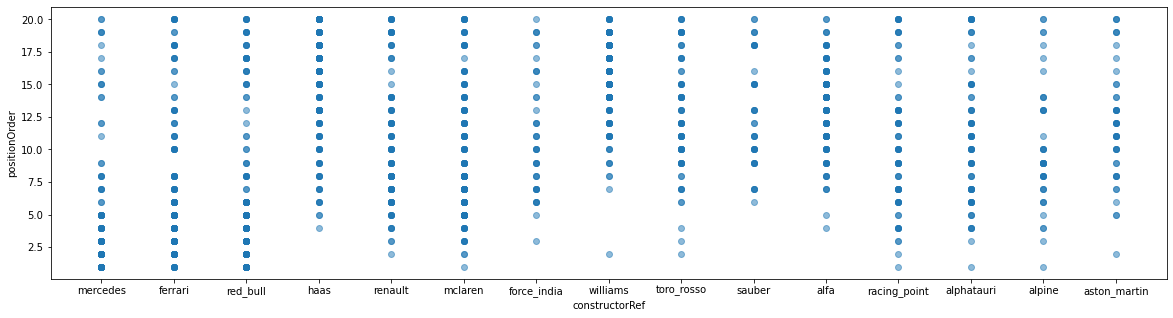

In [9]:
# Results for each constructor

fig, ax = plt.subplots(1, 1, figsize=(20,5))
ax.scatter(x=datos.constructorRef, y=datos.positionOrder, alpha=.5)
ax.set_xlabel('constructorRef')
ax.set_ylabel('positionOrder');

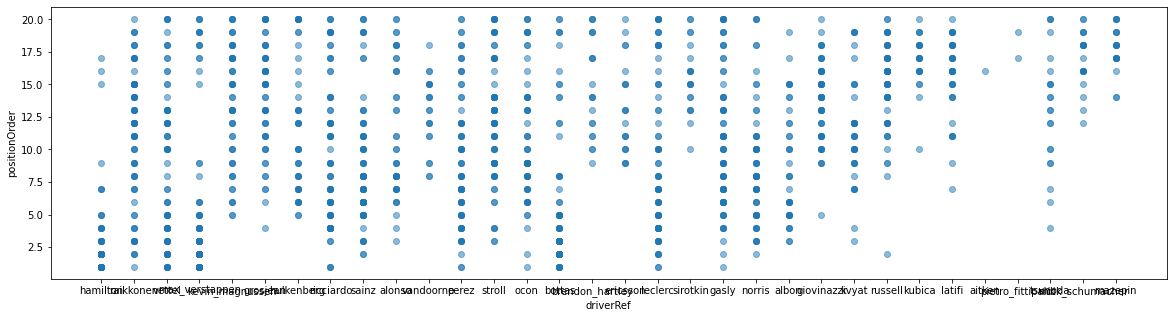

In [10]:
# Results for each driver

fig, ax = plt.subplots(1, 1, figsize=(20,5))
ax.scatter(x=datos.driverRef, y=datos.positionOrder, alpha=.5)
ax.set_xlabel('driverRef')
ax.set_ylabel('positionOrder');

# Car speed Fastest lap rank

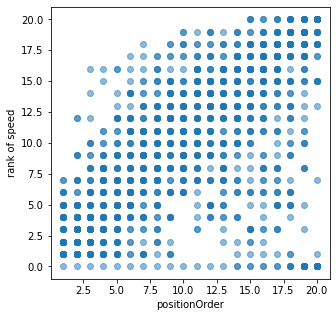

In [5]:
# Plotting relationship between theCar speed Fastest lap rank and end position of the race

fig, ax = plt.subplots(1, 1, figsize=(5,5))
ax.scatter(x=datos.positionOrder, y=datos.rankfast, alpha=.5)
ax.set_xlabel('positionOrder')
ax.set_ylabel('rank of speed');

# Starting position

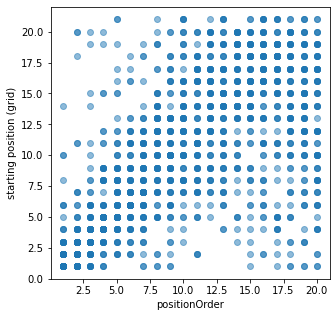

In [6]:
# Plotting relationship between starting position and end position of the race

fig, ax = plt.subplots(1, 1, figsize=(5,5))
ax.scatter(x=datos.positionOrder, y=datos.grid, alpha=.5)
ax.set_xlabel('positionOrder')
ax.set_ylabel('starting position (grid)');

# Number of the fastestLap

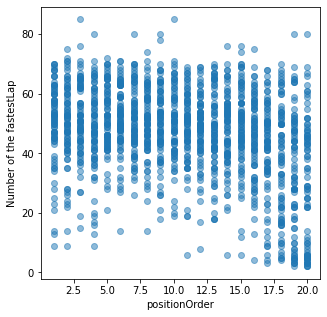

In [7]:
# Plotting relationship between starting position and end position of the race

fig, ax = plt.subplots(1, 1, figsize=(5,5))
ax.scatter(x=datos.positionOrder, y=datos.fastestLap, alpha=.5)
ax.set_xlabel('positionOrder')
ax.set_ylabel('Number of the fastestLap');

# Drivers experiense per total number of races

In [12]:
# Getting the unique Driver ID

Unique_Drivers = datos["driverId"].unique()
datos_total_red = datos_total[['driverId','resultId']]
filtered_red = datos_total_red[datos_total_red.driverId.isin(Unique_Drivers)]

In [13]:
# Getting the count of every driverID

freq_red = filtered_red.groupby(['driverId']).count() 
cuentas_red = pd.DataFrame(freq_red)

In [14]:
# Adding the column exp_driver and transform it to a Rank

cuentas_red_1 = cuentas_red.set_axis(['exp_driver'], axis=1)
cuentas_red_1["rank_exp_driver"] = cuentas_red_1.rank(method="min",ascending=False)
datos['rank_exp_driver'] = datos["driverId"].map(cuentas_red_1["rank_exp_driver"])

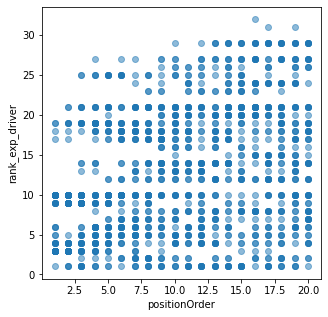

In [15]:
# Plotting relationship between the rank of drivers experiense per number of races and end position of the race

fig, ax = plt.subplots(1, 1, figsize=(5,5))
ax.scatter(x=datos.positionOrder, y=datos.rank_exp_driver, alpha=.5)
ax.set_xlabel('positionOrder')
ax.set_ylabel('rank_exp_driver');

# Drivers experiense per number of times a pilot has run each circuit 

In [13]:
# Selecting the columns from original dataframe and filter by Unique_drivers (DriversID)

datos_total_rrc = datos_total[['resultId','circuitId','driverId']]
filtered_rrc = datos_total_rrc[datos_total_rrc.driverId.isin(Unique_Drivers)]
filtered_rrc = pd.DataFrame(filtered_rrc)

In [14]:
#Calculate the count of every driverID in every circuitID and getting the rank

freq_rrc = filtered_rrc.groupby(['circuitId','driverId'], as_index=False).count().rename({'resultId':'count'}, axis=1) 
freq_rrc["rank_Run_circuit"] = freq_rrc["count"].rank(method="first",ascending=False)

In [15]:
# Merging the rank by circuitID and driverID to the main dataframe

merged_rrc = pd.merge(datos, freq_rrc, on=['circuitId', 'driverId'])
datos = merged_rrc.rename(columns={"resultId_x": "resultId", "count": "Run_circuit"})

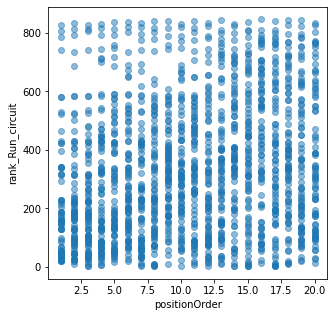

In [16]:
# Plotting relationship between the rank of drivers experiense per number of times a pilot has run each circuit and end position of the race

fig, ax = plt.subplots(1, 1, figsize=(5,5))
ax.scatter(x=datos.positionOrder, y=datos.rank_Run_circuit, alpha=.5)
ax.set_xlabel('positionOrder')
ax.set_ylabel('rank_Run_circuit');

# Constructor Failures Average per circuit (Number of failures attributed to the constuctor)

In [18]:
# Determining ids that refer to constructor failures

Unique_status = datos["statusId"].unique()
failures = [5,6,7,9,21,22,23,25,26,30,32,34,38,40,44,54,60,61,65,75,84,101,131]

In [19]:
# Filtering by ids that refer to constructor failures and creating a yes/no condition if exits at least one failure

datos_total_cf = datos_total[['resultId','constructorId','circuitId','statusId']]
filtered_cf = datos_total_cf[datos_total_cf.statusId.isin(Unique_status)]
filtered_cf = pd.DataFrame(filtered_cf)
filtered_cf["failures"] = np.where(filtered_cf["statusId"].isin(failures), "yes", "no")

In [20]:
# Calculate the count of every circuitId for each constructorId with failures

freq_cf = filtered_cf.groupby(['circuitId','constructorId','failures'], as_index=False).count().rename({'resultId':'count'}, axis=1) 
freq_cf = freq_cf.drop('statusId',axis='columns')
freq_cf = freq_cf.loc[freq_cf["failures"] == 'yes']

In [21]:
#Calculate the count of Circuits 

Count_circuits = filtered_cf.groupby(['circuitId'], as_index=False).count().rename({'resultId':'count'}, axis=1)
Count_circuits = Count_circuits.drop(['constructorId', 'statusId',"failures"], axis = 1)

In [22]:
# Calculate the Variable

merged_cf = pd.merge(freq_cf, Count_circuits, how="left", on=['circuitId'])
merged_cf["Constructor_Failures"] = (merged_cf['count_x']/merged_cf['count_y']) *100
merged_cf = merged_cf.drop(['count_x',"count_y"], axis = 1)

In [23]:
# Merge the result with the main dataframe

datos = pd.merge(datos, merged_cf, how="left", on=['circuitId', 'constructorId'])
datos['Constructor_Failures'] = datos['Constructor_Failures'].fillna(0)

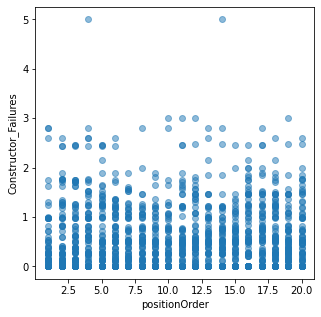

In [34]:
# Plotting relationship between the Constructor Failures Average per circuit and end position of the race

fig, ax = plt.subplots(1, 1, figsize=(5,5))
ax.scatter(x=datos.positionOrder, y=datos.Constructor_Failures, alpha=.5)
ax.set_xlabel('positionOrder')
ax.set_ylabel('Constructor_Failures');

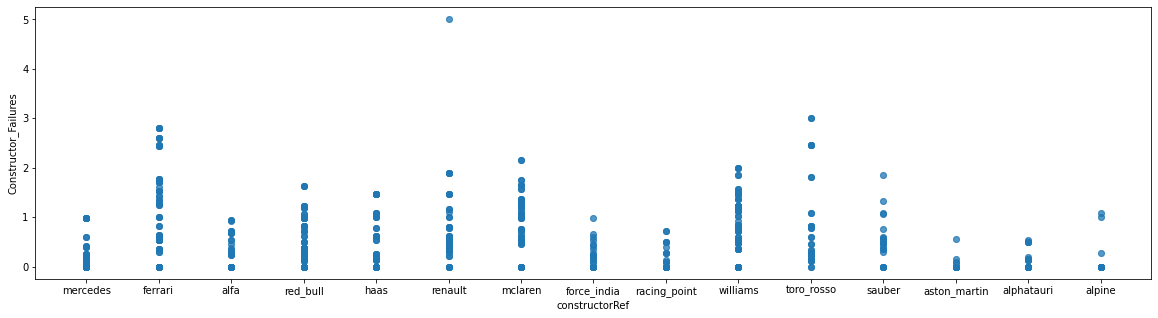

In [35]:
# Another plotting relationship between the Constructor Failures Average per circuit and end position of the race

fig, ax = plt.subplots(1, 1, figsize=(20,5))
ax.scatter(x=datos.constructorRef, y=datos.Constructor_Failures, alpha=.5)
ax.set_xlabel('constructorRef')
ax.set_ylabel('Constructor_Failures');

# Constructor Failures Average per circuit to each driver (Number of failures attributed to the constuctor)

In [27]:
# Filtering by ids that refer to constructor failures and creating a yes/no condition if exits at least one failure

datos_total_cfd = datos_total[['resultId','driverId','circuitId','statusId']]
filtered_cfd = datos_total_cfd[datos_total_cfd.statusId.isin(Unique_status)]
filtered_cfd = pd.DataFrame(filtered_cfd)
filtered_cfd["failures"] = np.where(filtered_cfd["statusId"].isin(failures), "yes", "no")

In [28]:
# Calculate the count of every circuitId for each driverId with failures

freq_cfd = filtered_cfd.groupby(['circuitId','driverId','failures'], as_index=False).count().rename({'resultId':'count'}, axis=1) 
freq_cfd = freq_cfd.drop('statusId',axis='columns')
freq_cfd = freq_cfd.loc[freq_cfd["failures"] == 'yes']

In [29]:
# Count of Circuits

Count_circuits_driver = filtered_cfd.groupby(['circuitId'], as_index=False).count().rename({'resultId':'count'}, axis=1)
Count_circuits_driver = Count_circuits_driver.drop(['driverId', 'statusId',"failures"], axis = 1)

In [30]:
# Calculate Variable

merged_cfd = pd.merge(freq_cfd, Count_circuits_driver, how="left", on=['circuitId'])
merged_cfd["Constructor_Failures_Driver"] = (merged_cfd['count_x']/merged_cfd['count_y']) *100
merged_cfd = merged_cfd.drop(['count_x',"count_y"], axis = 1)

In [31]:
# Merge the result with the main dataframe

datos = pd.merge(datos, merged_cfd, how="left", on=['circuitId', 'driverId'])
datos['Constructor_Failures_Driver'] = datos['Constructor_Failures_Driver'].fillna(0)

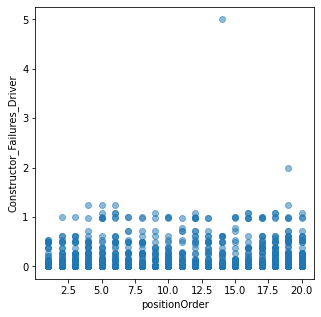

In [32]:
# Ploting relationship between the Constructor Failures Average per driver and end position of the race

fig, ax = plt.subplots(1, 1, figsize=(5,5))
ax.scatter(x=datos.positionOrder, y=datos.Constructor_Failures_Driver, alpha=.5)
ax.set_xlabel('positionOrder')
ax.set_ylabel('Constructor_Failures_Driver');

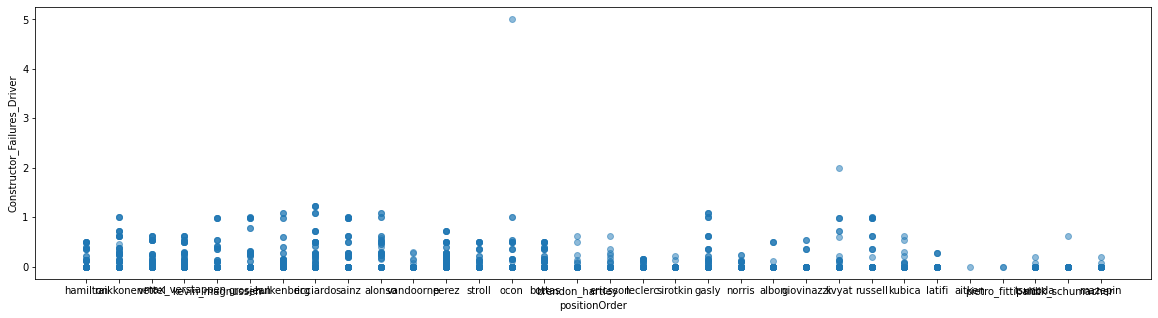

In [33]:
# Another plotting relationship between the Constructor Failures Average per driver and end position of the race

fig, ax = plt.subplots(1, 1, figsize=(20,5))
ax.scatter(x=datos.driverRef, y=datos.Constructor_Failures_Driver, alpha=.5)
ax.set_xlabel('positionOrder')
ax.set_ylabel('Constructor_Failures_Driver');

# Constructor Failures Average per each driver (Number of failures attributed to the constuctor)

In [36]:
# Filtering by ids that refer to constructor failures and creating a yes/no condition if exits at least one failure

datos_total_cfdc = datos_total[['driverId','constructorId','statusId']]
filtered_cfdc = datos_total_cfdc[datos_total_cfdc.statusId.isin(Unique_status)]
filtered_cfdc = pd.DataFrame(filtered_cfdc)
filtered_cfdc["failures"] = np.where(filtered_cfdc["statusId"].isin(failures), "yes", "no")

In [37]:
# Calculate the count of every constructorId for each driverId with failures

freq_cfdc = filtered_cfdc.groupby(['constructorId','driverId','failures'], as_index=False).count().rename({'statusId':'count'}, axis=1) 
freq_cfdc = freq_cfdc.loc[freq_cfdc["failures"] == 'yes']

In [38]:
# Count constructorId appers

constructorId_appers = filtered_cfdc.groupby(['constructorId'], as_index=False).count().rename({'driverId':'count'}, axis=1)
constructorId_appers = constructorId_appers.drop(['statusId',"failures"], axis = 1)

In [39]:
# Calculate Variable

merged_cfdc = pd.merge(freq_cfdc, constructorId_appers, how="left", on=['constructorId'])
merged_cfdc["Constructor_Failures_Driver_Constructor"] = (merged_cfdc['count_x']/merged_cfdc['count_y']) *100
merged_cfdc = merged_cfdc.drop(['count_x',"count_y"], axis = 1)

In [40]:
# Merge the result with the main dataframe

datos = pd.merge(datos, merged_cfdc, how="left", on=['constructorId','driverId'])
datos['Constructor_Failures_Driver_Constructor'] = datos['Constructor_Failures_Driver_Constructor'].fillna(0)

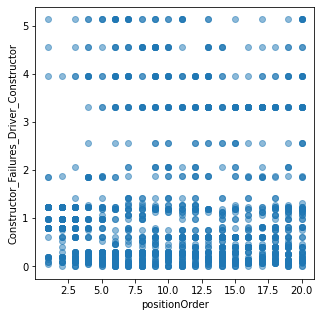

In [42]:
# Ploting relationship between the number of failures per each driver and constructor versus the end position of the race

fig, ax = plt.subplots(1, 1, figsize=(5,5))
ax.scatter(x=datos.positionOrder, y=datos.Constructor_Failures_Driver_Constructor, alpha=.5)
ax.set_xlabel('positionOrder')
ax.set_ylabel('Constructor_Failures_Driver_Constructor');

In [21]:
# Export the final dataframe to a csv with all the variables created.

datos.to_csv("../Resources/Formula1_dataprocessed.csv", index=False)

           resultId       raceId     driverId  constructorId       number  \
count   1619.000000  1619.000000  1619.000000    1619.000000  1619.000000   
mean   24593.916615  1029.849907   654.443484      70.034589    28.008647   
std      468.826216    24.518031   336.038982      85.504719    25.666323   
min    23782.000000   989.000000     1.000000       1.000000     2.000000   
25%    24187.500000  1009.000000   807.000000       4.000000     8.000000   
50%    24595.000000  1029.000000   830.000000       9.000000    18.000000   
75%    24999.500000  1052.000000   842.000000     131.000000    44.000000   
max    25404.000000  1073.000000   854.000000     214.000000    99.000000   

              grid  positionOrder       points         laps     rankfast  \
count  1619.000000    1619.000000  1619.000000  1619.000000  1619.000000   
mean     10.544781      10.494132     5.066399    54.329216     9.730080   
std       5.828699       5.765005     7.218282    17.921190     5.881244   
mi